In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

## 1. ELT

In [2]:
transform = transforms.ToTensor()
# After this value will be normalized to [0, 1] and also convert to tensor

In [5]:
train_data = datasets.MNIST(root="../data", train=True, download=True, transform = transform)

# Split the train into train and val
print(len(train_data))

train_set, val_set = torch.utils.data.random_split(train_data, [50000, 10000])
print(len(train_set), len(val_set))

60000
50000 10000


In [10]:
test_set = datasets.MNIST(root="../data", train=False, download=True, transform = transform)

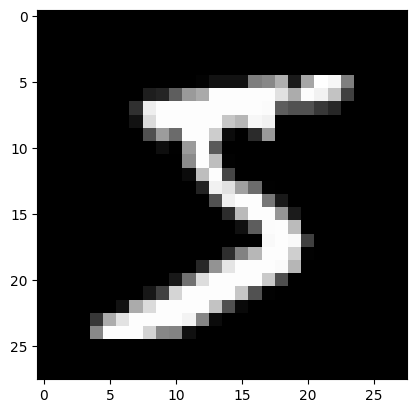

In [11]:
train_set[0][0].shape

plt.imshow(train_data[0][0].reshape((28,28)), cmap="gray")

#The label train_set[0][1]


## 2.Create the dataloaders

In [13]:
#train_batch_size = 10
#val_batch_size = everything
#test_batch_size = everything
#all shuffel = True

#format: DataLoater(dataset, batch_size, shuffell)

torch.manual_seed(999)

train_loader = DataLoader(train_set, batch_size=10, shuffle=True)
val_loader = DataLoader(val_set, batch_size=len(val_set), shuffle=True)
test_loader = DataLoader(test_set, batch_size=len(test_set), shuffle=True)


## 3. Test the dataloader

In [15]:
# Run the loop train_loader and break, and print out the sahpe of image label

for images, label in train_loader:
    print(images.shape) #(100, 1, 28, 28)
    print(label.shape) #(100)
    break


# [10, 1, 28, 28] - [batch size, c, w, h]
# [10] - [batch size] = target

torch.Size([10, 1, 28, 28])
torch.Size([10])


## 4. Learn about nn.Conv2d

In [16]:
#format: nn.Conv2d(input_cahnnel, output_channel, kernel_size, stride=1, padding=0)

# Image has one channel
# Convert to channel 1-13
# kernel_size 3 (13 differnt kernels)
# stride = 3
# padding = 0

chaky_layer = nn.Conv2d(1, 13, 3, 1, 0)

In [17]:
chaky_layer

Conv2d(1, 13, kernel_size=(3, 3), stride=(1, 1))

In [18]:
chaky_layer.weight.shape

torch.Size([13, 1, 3, 3])

In [19]:
chaky_layer.bias.shape

torch.Size([13])

In [20]:
chaky_layer.weight

Parameter containing:
tensor([[[[-0.1488,  0.3060, -0.3001],
          [-0.2143, -0.0603,  0.0349],
          [ 0.2818, -0.3011,  0.2003]]],


        [[[-0.1129,  0.0217, -0.1953],
          [-0.1819,  0.2315,  0.1760],
          [ 0.1480,  0.1662, -0.0794]]],


        [[[ 0.0662, -0.2149, -0.2833],
          [ 0.1036,  0.0335, -0.3106],
          [ 0.1787, -0.0230,  0.1474]]],


        [[[-0.0896,  0.1143,  0.0705],
          [-0.1452,  0.2097, -0.0666],
          [ 0.3240, -0.1127,  0.1975]]],


        [[[ 0.2367,  0.0543,  0.0424],
          [-0.0604, -0.2670,  0.1890],
          [ 0.2741,  0.2704, -0.3307]]],


        [[[-0.2509,  0.1992,  0.1247],
          [ 0.2203,  0.2944, -0.2208],
          [-0.2652, -0.3040, -0.2432]]],


        [[[-0.2288,  0.2622, -0.1422],
          [-0.1832, -0.2574,  0.2397],
          [ 0.2503, -0.1449, -0.1419]]],


        [[[ 0.2987, -0.1667, -0.0288],
          [ 0.3072,  0.1442, -0.0993],
          [-0.2000, -0.0865,  0.2278]]],


        [[

In [21]:
#Take one image
image = train_set[0][0]
image.shape

torch.Size([1, 28, 28])

In [24]:
out = chaky_layer(image)
out.shape

torch.Size([13, 26, 26])

In [25]:
#(W - F +2* P)/S +1
(28 -3 + 0) / 1 + 1

26.0

In [26]:
# Create another convolution layer
# Input [13, 26, 26]
# kernel_size = 3, strinde = 1, padding =0, output_channel = 5, input_chanel = ??
#format: nn.Conv2d(input_cahnnel, output_channel, kernel_size, stride=1, padding=0)

chaky_layer2 = nn.Conv2d(13, 5, 3, 1, 0)
out2 = chaky_layer2(out)
print(out2.shape)

torch.Size([5, 24, 24])


In [28]:
# Create 2 Conv. layers
# Output ch. 256, then 128
# Kernel size = 5, stride = 1, padding = 0

chaky_layer3 = nn.Conv2d(1, 256, 5, 1, 0)
out1 = chaky_layer3(image)
print(out1.shape)




torch.Size([256, 24, 24])


In [30]:
chaky_layer4 = nn.Conv2d(256, 128, 5, 1, 0)
out2 = chaky_layer4(out1)
print(out2.shape)

torch.Size([128, 20, 20])


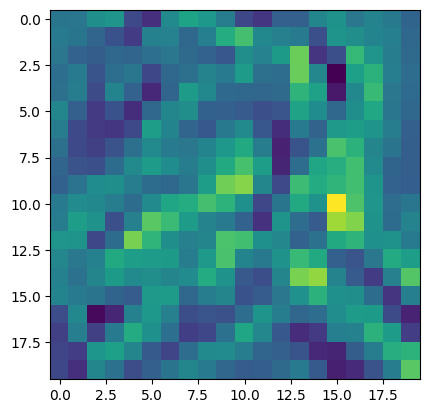

In [32]:
plt.imshow(out2[0].detach().numpy())

In [ ]:
# chocksuper2 = nn.Sequential(nn.Conv2d(1,256,5,1,0),nn.Conv2d(256,128,5,1,0))
# out3 = chocksuper2(image)
# print(out3.shape)
# print()
# plt.imshow(out3[0].detach().numpy())


## 5. Learn about maxpool2d and batchnorm and dropout

In [34]:
pool = nn.MaxPool2d(2,2)

In [35]:
image.shape

torch.Size([1, 28, 28])

In [36]:
out = pool(image)
out.shape

torch.Size([1, 14, 14])

## 6. Create the model

In [48]:
#convolutional neural network
class ChakyCNN(nn.Module):
    
    def __init__(self):
        super().__init__()
        #create 2 convolutional layer (1 -> 6 -> 16)
        #stride = 1, kernel_size = 3
        self.conv1 = nn.Conv2d(1, 6, 3, 1)  #(input_size - k + 2P) / s +1
        #input w/h = (28 - 3 + 0) / 1 + 1 = 26
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        #input w/h = (24 - 3 + 0) /1 + 1 = 24
        #three linear layers here
        #1st layer - from image (b, c, w, h) --> (b, c*w*h) in order to input to linear layer
        #1st layer input_size -> 120  (input_size here is channel x w x h)
        self.linear1 = nn.Linear(16*5*5, 120)
        #2nd layer 120 -> 84
        self.linear2 = nn.Linear(120, 84)
        #3rd layer 84 -> 10  (10 is the output_size)
        self.linear3 = nn.Linear(84, 10)
        
        self.maxpool = nn.MaxPool2d(2, 2)
        self.relu = nn.ReLU()
        
    def forward(self, image):
        #image.shape:  (B, C, W, H)
        out = self.conv1(image)  #convolution1
        #out.shape:    (B, 6, 26, 26)
        out = self.relu(out) #relu
        out = self.maxpool(out) #maxpool2d
        #out.shape:    (B, 6, 13, 13)
        
        #(input_size - k + 2P) / s +1
        # 13 - 3 / 1 + 1 = 11
        out = self.conv2(out) #convolution2
        #out.shape (B, 16, 11, 11)
        out = self.relu(out) #relu
        out = self.maxpool(out) #maxpool2d
        #out.shape (B, 16, 5, 5)

        out = out.reshape(-1, 16*5*5)
        
        #linear1 -> relu
        #linear2 -> relu
        #linear3
        out = self.linear1(out)
        out = self.relu(out)
        #out.shape (B, 120)
        #linear2 -> relu
        out = self.linear2(out)
        out = self.relu(out)
        #out.shape (B, 84)
        #linear3 -> relu
        out = self.linear3(out)
        #out.shape (B, 10)
        return out

## 7. Test the model

In [49]:
model = ChakyCNN()

random_image = torch.rand((1, 1, 28, 28))

out = model(random_image)

out.shape

#assert out.shape = ()

torch.Size([1, 10])

In [50]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>6}')
    print(f'______\n{sum(params):>6}')


In [51]:
count_parameters(model)

# Why 60074?


    54
     6
   864
    16
 48000
   120
 10080
    84
   840
    10
______
 60074


In [ ]:
#epochs = 5
#for epochs
    #for train loader
        #image
        #label
        
        #1. model
        #2. loss
        
        #collect the loss and acc
        #with torch.no_grad(): evaluate the valid_loader acc and loss
        
        #3. zero_grad
        #4. backward
        #5. step
        
        #print the loss and acc if epoch / 1

## 8. Training

In [ ]:
J_fn = nn.CrossEntropyLoss()

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [ ]:
epochs = 10 
losses = []
for e in range(epochs):
    total_corr = 0
    acc = 0
    for b, (images, label) in enumerate(train_loader):  
        #image reshape to (m,n)
        #images = images.reshape(-1, 28*28).to(device) #(100, 784) - > 28*28 is 784 the rest is indacated by -1
        #targets
        #targets = label.to(device)

        #1.Predict
        yhat = model(images) #(100, 10)
        #1.1 Calculate accuracy
        predicted = torch.max(yhat, 1)[1] # If you use 0, it will return the probability, 1 is the index
        #predicted.shape(100)
        batch_corr = (predicted == label).sum()
        total_corr += batch_corr

        #collect the loss and acc
        #with torch.no_grad(): evaluate the valid_loader acc and loss
        with torch.no_grad():
            val_corr = 0
            for val_image, val_label in val_loader:
                val_yhat = model(image)
                val_loss = J_fn(val_yhat, val_label)
                predicted = torch.max(val_yhat, 1)[1] 
                val_corr += val_corr
            print()

        #2.Loss
        loss = J_fn(yhat, label)
        losses.append(loss)
        #3.clear gradients using zero_grad()
        optimizer.zero_grad()
        #4. backprop using backward()
        loss.backward() # Backward is what we want to minimize - i.e. the loss
        #5. update using step()
        optimizer.step()  # Update the optimizer SGD

        if b % 200 == 0:
            acc = (total_corr * 100) / (10 * (b+1))
            print(f"Epoch: {e}; Batch: {b : >4}; Loss: {loss:.2f}; Acc: {acc:.2f}")

## 9. Testing